# Compare plot_vtk_matplotlib and VTK

## Reading files

In [1]:
%matplotlib inline
import numpy as np
# import plot_vtk_matplotlib as pvm
from vtk.util.numpy_support import vtk_to_numpy
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import vtk
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def getData_pvm(filename):
    vf_plot = pvm.plot_vtk_matplotlib(filename,z_max=0.001, z_min=-0.001, vtkfiletype="UnstructuredGrid"  )
    # Extract the data from the file
    vf_plot.extract_data()
    nodes_vtk = vf_plot.reader.GetOutput().GetPoints().GetData()
    data_arrays = vf_plot.reader.GetOutput().GetPointData()
    pressure_vtk_array = data_arrays.GetArray(0) 
    speed_vtk_array = data_arrays.GetArray(1)
    nodes = vtk_to_numpy(nodes_vtk)
    p = vtk_to_numpy(pressure_vtk_array)
    U  = vtk_to_numpy(speed_vtk_array)
    return nodes, p, U

In [3]:
def getData_vtk(filename):
    # load a vtk file as input
    reader = vtk.vtkUnstructuredGridReader()
    reader.SetFileName(filename)
    reader.Update()
    print reader.GetOutput().GetPoints()
    # Get the coordinates of nodes in the mesh
    nodes_vtk_array= reader.GetOutput().GetPoints().GetData()  
    pressure_vtk_array = reader.GetOutput().GetPointData().GetArray(0)
    speed_vtk_array = reader.GetOutput().GetPointData().GetArray(1)
    nodes = vtk_to_numpy(nodes_vtk_array)
    p = vtk_to_numpy(pressure_vtk_array)
    U  = vtk_to_numpy(speed_vtk_array)
    return nodes, p, U

In [4]:
def plot3D(nodes, a, vmin, vmax):
    cmap = mpl.cm.seismic
    color_map = plt.cm.get_cmap('seismic')
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111, projection='3d')
    #for i in range(0,len(nodes),2):
    splt = ax.scatter(nodes[:,0],nodes[:,1],nodes[:,2],s=60,
                   c = a,
                   cmap = color_map,
                   vmin = vmin,
                   vmax = vmax,
                   marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.colorbar(splt, shrink=0.5)
    plt.show()


In [5]:
def extractFlatData(nodes, p, U):
    merged = np.empty([len(nodes),6])
    merged[:,0] = p
    merged[:,1:3] = U[:,:2]
    merged[:,3:] = nodes
    # Merged z0 and z1 arrays should be same because of 
    # the model symmetry along z-axis
    merged_z0 = merged[np.where(merged[:,5] == 0)]
    merged_z1 = merged[np.where(merged[:,5] != 0)]
    # Extract nodes, p and U arrays from z0 array
    p = merged_z0[:,0]
    U = merged_z0[:,1:3]
    nodes = merged_z0[:,3:5]
    return nodes, p, U

def plot2D(nodes, a, vmin, vmax):     
    # 2d plotting
    fig = plt.figure(figsize=(8,6))
    cmap = mpl.cm.seismic
    color_map = plt.cm.get_cmap('seismic')
    axes = plt.gca()
    #axes.set_xlim([-.1,2.1])
    #axes.set_ylim([-.01,0.11])
    #plt.axis('off')
    sc = plt.scatter(nodes[:,0],nodes[:,1],
                     s=320,
#                     color=cmap(a / a_max),
                     c = a,
                     cmap = color_map,
                     vmin = vmin,
                     vmax = vmax,
                     linewidth=0, 
                     marker="s")
    plt.colorbar(sc)
    fig.tight_layout()

vtkPoints (0x2641400)
  Debug: Off
  Modified Time: 127
  Reference Count: 2
  Registered Events: (none)
  Data: 0x2633d20
  Data Array Name: Points
  Number Of Points: 882
  Bounds: 
    Xmin,Xmax: (0, 2)
    Ymin,Ymax: (0, 0.1)
    Zmin,Zmax: (0, 0.01)


(0.0, 8.3082698e-05)


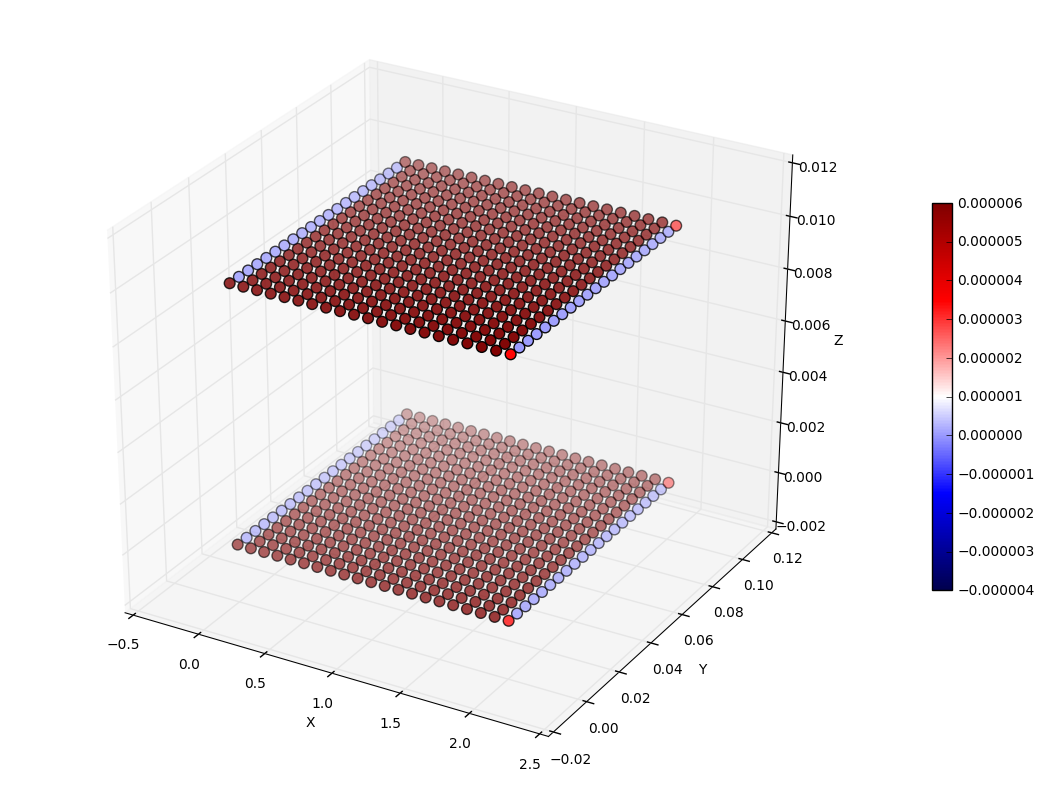

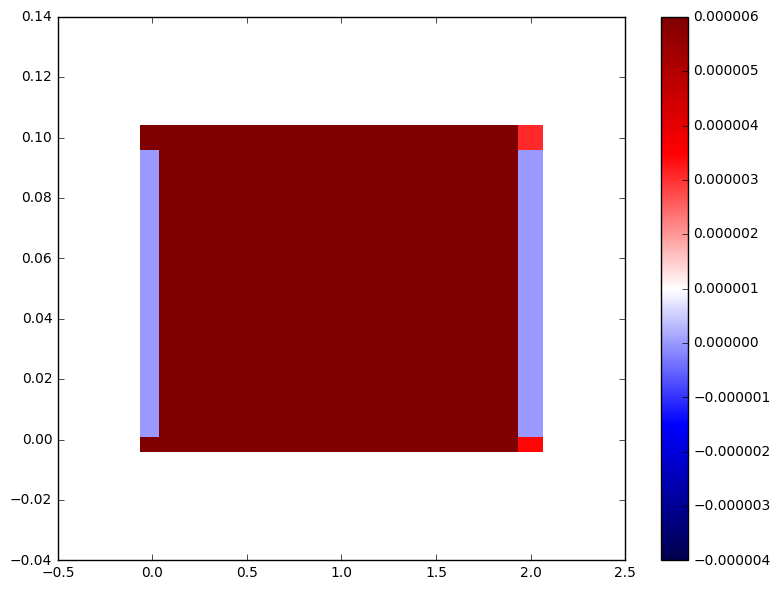

In [6]:
filename = "ppWall_60.vtk"
#nodes, p , U   = getData_pvm(filename)
nodes, p, U = getData_vtk(filename)
print(np.amin(p),np.amax(p))
vmin = -4e-06
vmax = 6e-06
plot3D(nodes,p, vmin, vmax)
nodes_half, p_half, U_half = extractFlatData(nodes, p, U)
plot2D(nodes_half,p_half, vmin, vmax)
